<a href="https://colab.research.google.com/github/panzershracker/Deep-learning-in-comp.-vision/blob/master/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
img = imageio.imread('/content/drive/My Drive/Deep learning in comp. vision/1 урок/artificial-intelligence-AI-810x476.jpg')
# img = img.astype(np.float32) / 255.
print(img.shape)

(476, 810, 3)


### Исходное изображение

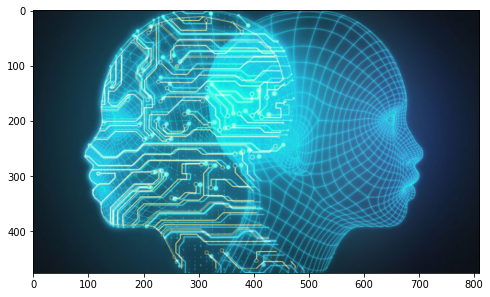

In [214]:
plt.figure(figsize=[8,8])
plt.imshow(img)
plt.show()

In [0]:
from skimage.color import rgb2hsv, rgb2gray

In [0]:
img_hsv = rgb2hsv(img)

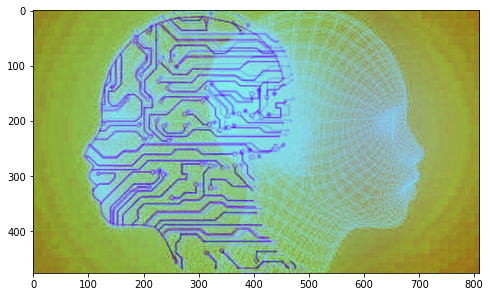

In [217]:
plt.figure(figsize=[8,8])
plt.imshow(img_hsv)
plt.show()

### Перевод изображения в черно-белое путем усреднения значений цвета.

In [0]:
img_bw = np.mean(img, axis=2)

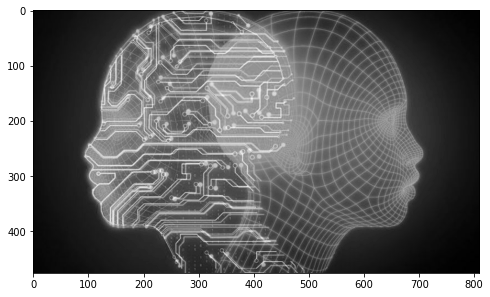

In [219]:
plt.figure(figsize=[8,8])
plt.imshow(img_bw, cmap='gray')
plt.show()

### Фильтрация

In [220]:
img = img[:,:,0].astype(np.float32) / 255.
img.shape

(476, 810)

In [0]:
from scipy import signal

### Используем ядро с распределением Гаусса.

In [0]:
def gauss(len, std):
  kern_1d = signal.gaussian(len, std=std).reshape(len,1)
  kern_2d = np.outer(kern_1d, kern_1d)
  return kern_2d

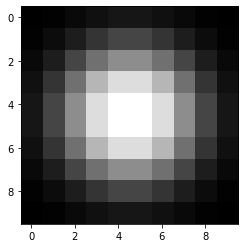

In [223]:
plt.figure(figsize=[4,4])
plt.imshow(-gauss(10, 2), cmap='Greys')
plt.show()

In [0]:
win_size = (11,11)

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1),
     dtype=np.float32
)

In [0]:
win = -gauss(11, 2)

In [0]:
for w in range(out_img.shape[0]):
  for h in range(out_img.shape[1]):
    x = img[w:w + win.shape[0], h:h + win.shape[1]]

    out_img[w,h] = np.sum(win * x) 

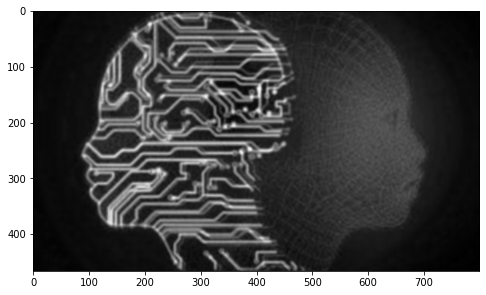

In [227]:
plt.figure(figsize=[8,8])
plt.imshow(out_img, cmap='Greys')
plt.show()